In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine, text

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query(text('SELECT * FROM weatherinszeged'), con=engine.connect())

# No need for an open connection, because you're only doing a single query
engine.dispose()

In [2]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

In [4]:
weather_df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [15]:
# target variable
Y = weather_df['temperature']

# Explanatory variables
X = weather_df[['humidity','windspeed','windbearing','pressure']]

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)
predictions = lrm.predict(X)

# Print the estimated coefficients
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)



Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528539


In [49]:
# Now checking if the model meets the Gauss Markov conditions

In [20]:
predictions = lrm.predict(X)
errors = Y - predictions
print('Mean of the errors in the weather model is: {}'.format(np.mean(errors)))

Mean of the errors in the weather model is: -1.3931582166782926e-15


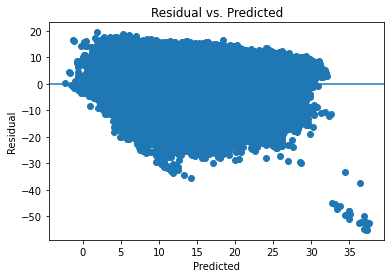

In [21]:
# Checking for heteroscedasticity of error terms

plt.scatter(predictions,errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
# Tests checking for homoscedasticity of errors

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions,errors)
lev_stats = levene(predictions,errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


In [45]:
# Implies that the errors are heteroscedastic
# Crucially, OLS will still remain a consistent estimator and produce unbiased parameter estimates in the presence of heteroscedasticity. The primary downside is that hypothesis tests on the parameters may produce biased parameter estimation. They may inaccurately estimate the standard deviation of the sampling distribution of a parameter, which may lead to an erroneous conclusion that a feature is not statistically significant.

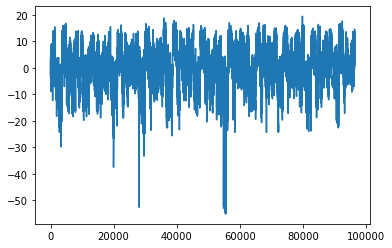

In [24]:
# Checking for uncorrelated error terms
plt.plot(errors)
plt.show()

In [28]:
# From the graph we are not sure whether the error terms are autocorrelated or not.

In [26]:
# Another way to look at correlations between errors is to use the autocorrelation function. 

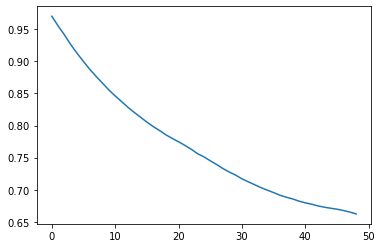

In [27]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [46]:
# Hence autocorrelation exists
# This type of serial correlation exists if we have omitted a relevant variable from the model.
# So, including the variable into the model can solve this issue.

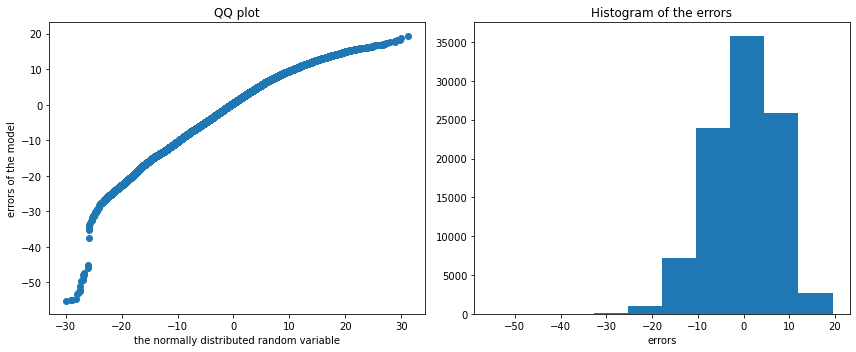

In [30]:
# Checking for normality of the errors

rand_nums = np.random.normal(np.mean(errors),np.std(errors),len(errors))

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums),np.sort(errors))
plt.xlabel('the normally distributed random variable')
plt.ylabel('errors of the model')
plt.title('QQ plot')

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel('errors')
plt.title('Histogram of the errors')

plt.tight_layout()
plt.show()

In [31]:
# using tests to determine if errors are normally distributed
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print('Jarque-Bera test statistic is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0],norm_stats[1]))

Jarque-Bera test statistic is 3793.2967352523665 and p value is 0.0
Normality test statistics is 3375.432307699585 and p-value is 0.0


In [48]:
# Hence we conclude that the errors are not normally distributed
# Specifically, normality of errors is not required to apply OLS to a linear regression model. But to measure the statistical significance of your estimated coefficients, error terms must be normally distributed. In the next lesson, you'll learn about t-tests and F-tests, which rest upon the normality of the errors.

# More often than not, non-normally distributed errors stem from omitted variables. Including the omitted relevant features to the model may help fix the issue. Sometimes, transforming the dependent variable also helps.